#### Descripción del Dataset: Netflix - TV Shows and Movies

Este dataset contiene información detallada sobre películas y series disponibles en Netflix, enriquecida con métricas provenientes de IMDb y TMDb.

Este proyecto realiza un análisis exploratorio y predictivo sobre el catálogo de películas y series disponibles en Netflix, utilizando un dataset enriquecido con métricas de popularidad y calificación provenientes de IMDb y TMDb. El objetivo es comprender patrones en los contenidos según tipo, duración, género, año de lanzamiento y país de producción, identificando tendencias relevantes en la industria del entretenimiento.

- id:	Identificador único del título en el dataset.
- title:	Nombre del título (película o serie).
- type:	Tipo de contenido: MOVIE o SHOW.
- description:	Breve sinopsis del título.
- release_year	Año en que fue lanzado originalmente.
- age_certification:	Clasificación por edad (e.g. PG, R, TV-MA). Puede estar vacía en algunos casos.
- runtime	Duración en minutos (para películas) o promedio por episodio (para series).
- genres	Lista de géneros asociados al contenido (formato tipo lista Python).
- production_countries	País o países de origen de la producción (también en formato lista).
- seasons	Número de temporadas (solo aplicable a series, NaN en películas).
imdb_id	ID del título en IMDb (útil para hacer joins externos si fuera necesario).
- imdb_score	Calificación promedio en IMDb (escala de 0 a 10).
- imdb_votes	Número total de votos recibidos en IMDb.
- tmdb_popularity	Índice de popularidad según TMDb (valor continuo). Métrica de visibilidad
- tmdb_score	Calificación promedio en TMDb (escala de 0 a 10).


tmdb_popularity: Es una métrica numérica continua (no categórica) que refleja cuán popular es un contenido en la plataforma TMDb, basada principalmente en:

- Número de visitas a la página del título en TMDb

- Frecuencia con que el título es marcado como favorito

- Número de votos recibidos

- Calificación promedio

- Factores de actualidad o tendencia (ej. búsquedas recientes)

tmdb_score: es una métrica de	calidad percibida, es decir, un promedio de calificaciones de usuarios (escala 0–10).	Métrica de calidad (cuantitativa continua)

#### Importación de las librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter
import ast

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Análisis exploratorio de datos

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/GabiMiranda05/Proyecto-Ingenias/refs/heads/main/titles.csv')

In [6]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

El dataset contiene 15 columnas con un total de 5806 registros

In [8]:
nulos = df.isnull().sum().to_frame(name="nulos")
nulos['porcentaje'] = round(nulos['nulos']/df.shape[0]*100,2)

nulos

,nulos,porcentaje
id,0,0.00
title,1,0.02
type,0,0.00
description,18,0.31
release_year,0,0.00
age_certification,2610,44.95
runtime,0,0.00
genres,0,0.00
production_countries,0,0.00
seasons,3759,64.74


 Se observa que algunas columnas presentan una cantidad significativa de valores faltantes. En particular:
 - age_certification tiene un 44.95% de valores nulos, lo que puede dificultar su uso como variable predictiva sin imputación o limpieza.

- seasons tiene 64.74% de nulos, lo cual es esperable ya que solo aplica a contenidos del tipo SHOW, no a MOVIE.

- Las columnas relacionadas con IMDb (imdb_id, imdb_score, imdb_votes) y TMDb (tmdb_score) también presentan entre un 5% y un 9% de datos faltantes.

In [9]:
# Estilo escogido para los gráficos
sns.set_theme(style='white', palette='pastel')

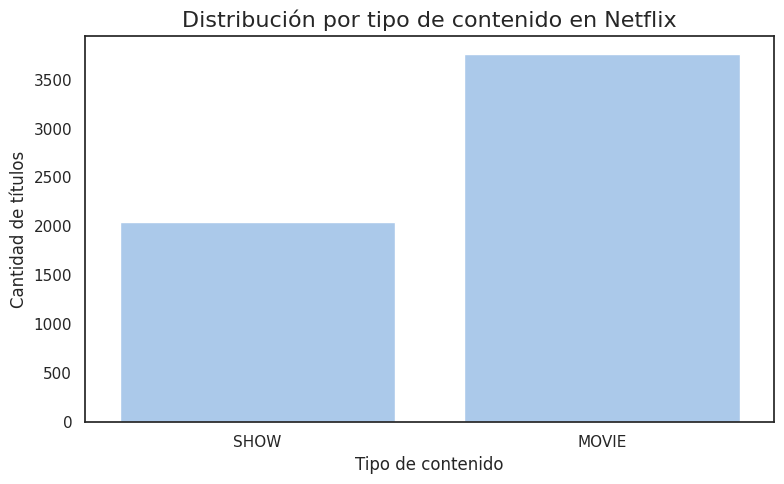

In [10]:
# Distribución por tipo de contenido
plt.figure(figsize=(8,5))
ax = sns.countplot(x='type', data=df)
plt.title('Distribución por tipo de contenido en Netflix', fontsize=16)
plt.xlabel('Tipo de contenido', fontsize=12)
plt.ylabel('Cantidad de títulos', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
(df['type'].value_counts(normalize=True) * 100).round(2)


,proportion
type,
MOVIE,64.74
SHOW,35.26


La mayoría del contenido en el catálogo es películas, casi dos tercios, mientras que las series representan poco más de un tercio.

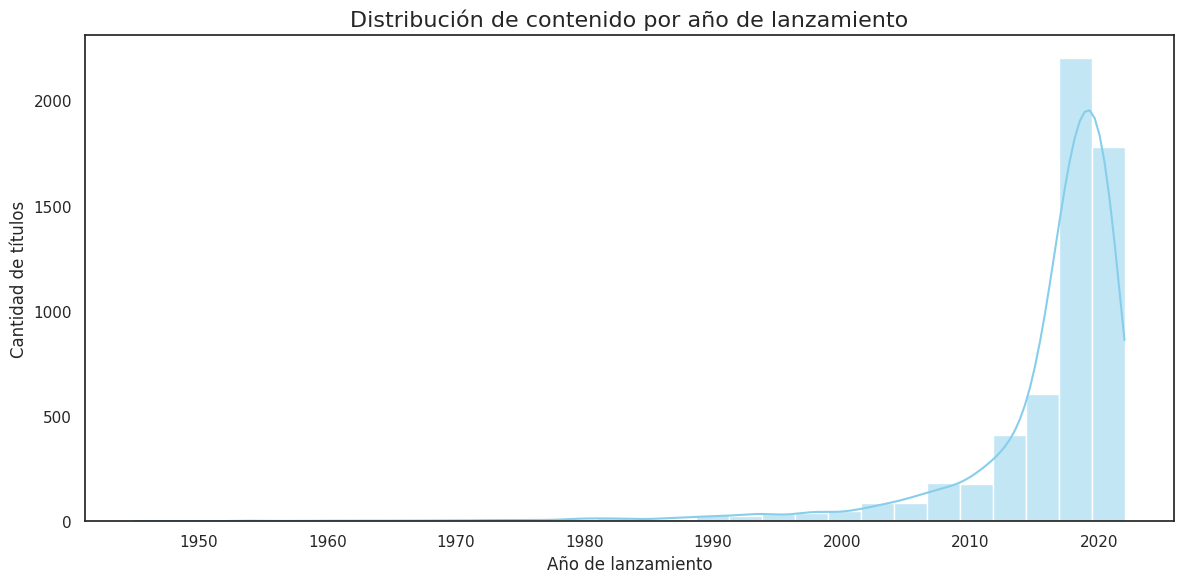

In [12]:
# Contenido por año de lanzamiento
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribución de contenido por año de lanzamiento', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Cantidad de títulos', fontsize=12)
plt.tight_layout()
plt.show()

- Se observa un aumento muy pronunciado en la cantidad de títulos lanzados a partir del año 2000, con un pico cercano al 2018-2020.
- La curva muestra una clara asimetría positiva, los datos están concentrados en los años recientes. La expansión del catálogo es acelerado en los últimos años.

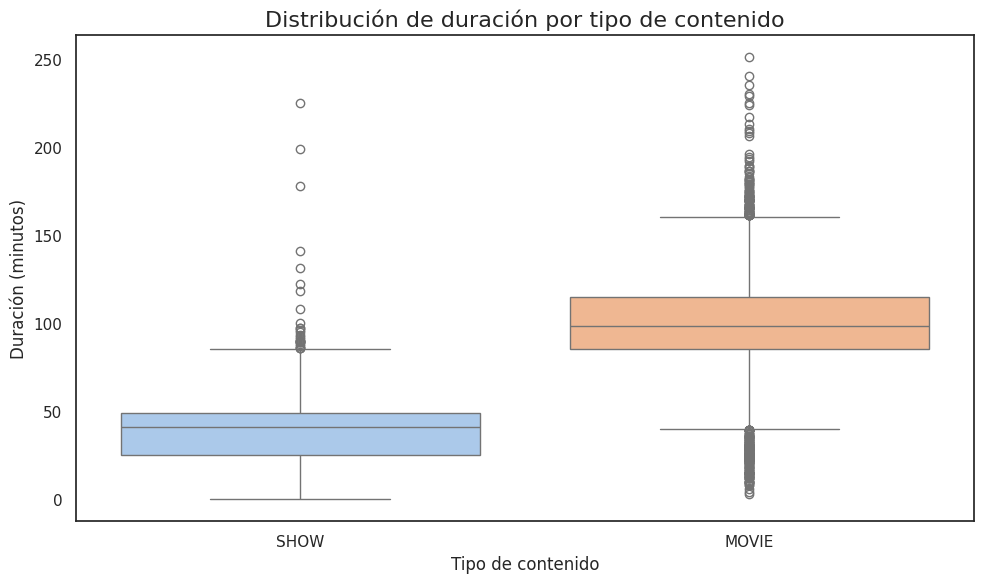

In [13]:
# Boxplot de duración por tipo
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='runtime', hue='type', data=df, palette='pastel', legend=False )
plt.title('Distribución de duración por tipo de contenido', fontsize=16)
plt.xlabel('Tipo de contenido', fontsize=12)
plt.ylabel('Duración (minutos)', fontsize=12)
plt.tight_layout()
plt.show()

- Las películas tienen una duración promedio considerablemente mayor, con una mediana cercana a los 100 minutos. En el caso de las series duran alrededor de 40 minutos, lo cual es típico de capítulos individuales.
- Las series tienen una distribución más concentrada, con menos dispersión y también con algunos valores atípicos. El rango de duración es más amplio en las películas, incluyendo varios outliers por encima de los 200 minutos

In [14]:
series = df[df['type'] == 'SHOW']
series['runtime'].describe()

,runtime
count,2047.000000
mean,38.821202
std,18.591043
min,0.000000
25%,25.000000
50%,41.000000
75%,49.000000
max,225.000000


In [15]:
series_outliers = series[(series['runtime'] < 10) | (series['runtime'] > 80)]
print(f"Cantidad de series con duración atípica: {series_outliers.shape[0]}")
series_outliers[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(10)

Cantidad de series con duración atípica: 111


,title,runtime
657,A Lion in the House,225
3268,The Hateful Eight: Extended Version,199
3828,1994,178
388,Dead Set,141
4997,Maya and the Three,131
1408,Sinatra: All or Nothing at All,122
4403,Paava Kadhaigal,118
2390,The Yard,108
2707,On Children,100
1476,Intersection,97


In [16]:
# Registros de series con runtime igual a 0
pd.set_option('display.max_columns', None)
df[(df['type'] == 'SHOW') & (df['runtime'] == 0)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
472,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,"['action', 'comedy', 'family', 'animation']",['US'],1.0,tt6963796,7.2,55.0,NaN,NaN
478,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,"['animation', 'comedy', 'family']",['US'],1.0,tt6929194,6.5,96.0,3.420,NaN
561,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,"['drama', 'comedy']",['CO'],1.0,tt0283770,7.5,303.0,46.411,7.8
896,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,"['comedy', 'animation']",['SA'],1.0,tt6298258,8.2,677.0,NaN,NaN
2618,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,['documentation'],['IN'],1.0,tt1877895,8.6,900.0,2.385,7.7
2627,ts94470,Relatable,SHOW,What happens when the '90s meets now? A group ...,2018,NaN,0,['comedy'],[],2.0,tt13281898,NaN,NaN,0.852,NaN
3130,ts104093,Dance & Sing With True,SHOW,True and her friends are making music -- and t...,2018,NaN,0,"['animation', 'family']",[],1.0,tt9315892,NaN,NaN,1.960,10.0
3165,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,['documentation'],['BR'],1.0,tt12467250,7.4,8.0,0.600,NaN
3752,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,"['action', 'scifi', 'sport', 'thriller', 'anim...",['XX'],1.0,tt11916718,5.7,156.0,1.112,NaN
3981,ts217719,Basketball or Nothing,SHOW,the lives of the Chinle High School boys' bask...,2019,TV-PG,0,"['documentation', 'sport']",['US'],1.0,tt10698408,7.4,614.0,3.310,8.3


In [17]:
# Filtrar solo los shows
shows = df[df['type'] == 'SHOW']

# Cantidad de shows con runtime igual a 0
count_runtime_0 = shows[shows['runtime'] == 0].shape[0]
count_runtime_0

24

Al visualizar los registros con runtime=0, se observan registros válidos con un posible error de registro solo en este dato. Se completan estos registros con la mediana de los SHOWS.

In [18]:
median_runtime = df.loc[(df['type'] == 'SHOW') & (df['runtime'] > 0), 'runtime'].median()
df.loc[(df['type'] == 'SHOW') & (df['runtime'] == 0), 'runtime'] = median_runtime

In [19]:
df_show_short = df[(df['type'] == 'SHOW') & (df['runtime'] < 10)]
df_show_short.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
187,ts22080,Oggy and the Cockroaches,SHOW,"Oggy, an anthropomorphic cat, would prefer to ...",1999,TV-Y7,9,"['comedy', 'family', 'action', 'animation', 'e...",['FR'],7.0,tt0213363,7.4,4185.0,26.074,7.5
394,ts33559,Shaun the Sheep,SHOW,Shaun the Sheep thinks and acts like a person ...,2007,TV-G,7,"['animation', 'comedy', 'family', 'european']",['GB'],6.0,tt0983983,8.0,25.0,24.246,7.9
413,ts23835,Masha and the Bear,SHOW,Masha is an energetic three-year-old who can’t...,2009,TV-Y,6,"['comedy', 'family', 'action', 'animation']",['RU'],5.0,tt1884856,7.6,3114.0,41.690,6.9
441,ts42914,Zig and Sharko,SHOW,On a desert island lives a starving hyena with...,2010,NaN,9,"['comedy', 'fantasy', 'romance', 'action', 'an...",['FR'],3.0,tt2046005,6.8,644.0,54.353,5.8
508,ts44663,Oscar's Oasis,SHOW,Oscar's Oasis is a is non-verbal animated cart...,2010,TV-Y,9,"['animation', 'comedy', 'european']",['FR'],1.0,tt2080922,7.4,572.0,7.759,7.3


Se observan muchos shows legítimos con formato corto, algunos son cortometrajes y el hecho de que tengan temporadas o un título consistente confirma su validez.

In [20]:
# Filtrar solo series con runtime mayor a 70 minutos
shows_largos = df[(df['type'] == 'SHOW') & (df['runtime'] > 80)]

# Mostrar los resultados ordenados por duración descendente
shows_largos = shows_largos.sort_values(by='runtime', ascending=False)

# Ver columnas clave
shows_largos.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
657,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,225,['documentation'],['US'],1.0,NaN,NaN,NaN,1.271,7.5
3268,ts90448,The Hateful Eight: Extended Version,SHOW,Trapped at a stagecoach stop as a storm rages ...,2019,TV-MA,199,"['western', 'crime', 'thriller', 'drama']",['US'],1.0,NaN,NaN,NaN,1.960,10.0
3828,ts90995,1994,SHOW,Archival video and new interviews examine Mexi...,2019,TV-MA,178,"['documentation', 'history']",['MX'],1.0,tt10243640,7.5,514.0,2.227,8.7
388,ts15986,Dead Set,SHOW,Zombies are rampaging throughout Britain. Blis...,2008,TV-MA,141,"['scifi', 'thriller', 'comedy', 'drama', 'horr...",['GB'],1.0,tt1285482,7.6,19684.0,9.747,7.3
4997,ts108042,Maya and the Three,SHOW,A Mesoamerican warrior princess embarks on a q...,2021,TV-Y7,131,"['comedy', 'drama', 'family', 'fantasy', 'anim...",['MX'],1.0,tt8787772,8.1,3597.0,55.962,7.7


Se observa runtime elevados provienen principalmente de miniseries, documentales especiales o cortes extendidos que están cargados como una única temporada

In [21]:
series = df[df['type'] == 'SHOW']
series['runtime'].describe()

,runtime
count,2047.000000
mean,39.301905
std,18.104500
min,2.000000
25%,25.000000
50%,41.000000
75%,49.000000
max,225.000000


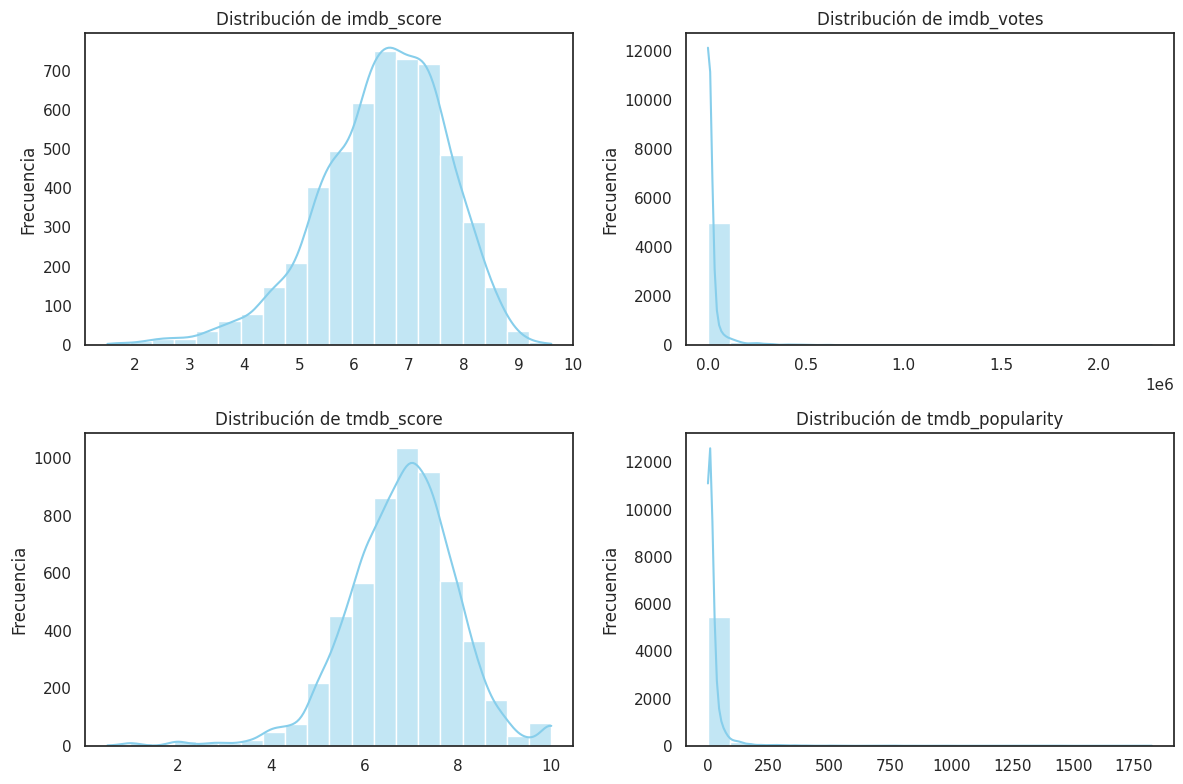

In [22]:
# Elegimos las columnas de interés
cols = ['imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity']

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    sns.histplot(df[cols[i]], kde=True, ax=ax, bins=20, color='skyblue')
    ax.set_title(f'Distribución de {cols[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**imdb Score**
- La curva KDE tiene forma aproximadamente normal, aunque algo sesgada hacia la izquierda. La mayoría de las películas tienen una puntuación entre 6 y 7,5. El pico mas alto esta alrededor de la calificación 6,5, lo que indica que ese valor es el más común.
- La distribución muestra una cola a la izquierda, lo que indica que hay más películas con puntuaciones moderadamente bajas que extramadamente altas.

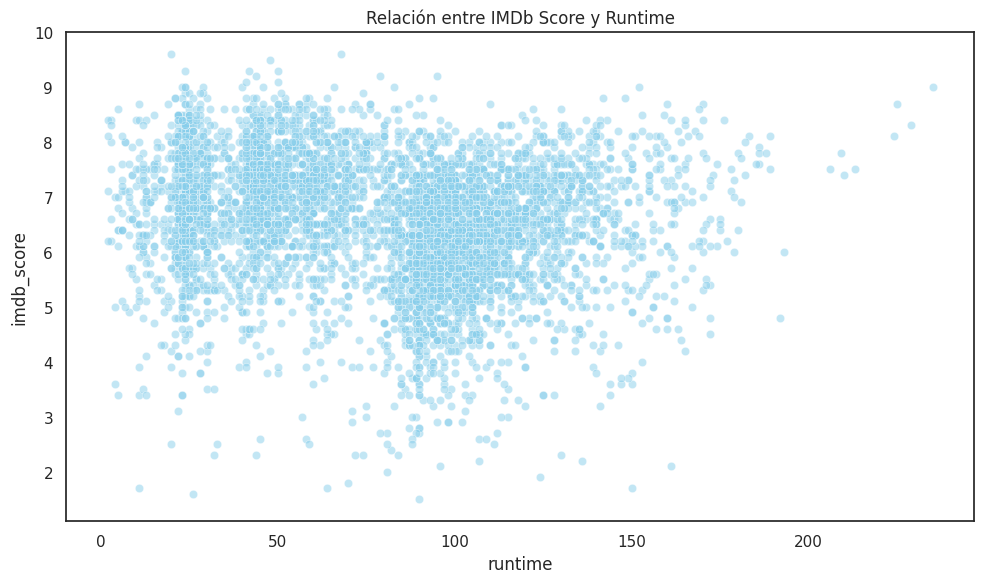

In [23]:
# Relación entre las variables IMBd_score y Runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='imdb_score', alpha=0.5, color='skyblue')
plt.title('Relación entre IMDb Score y Runtime')
plt.xlabel('runtime')
plt.ylabel('imdb_score')
plt.tight_layout()
plt.show()

En el gráfico se observa una nube de puntos dispersa, lo cual sugiere que no hay una relación lineal clara entre la duración de las películas y su puntuación IMDb. Se utilizará la matriz de correlación para visualizar esto numéricamente.

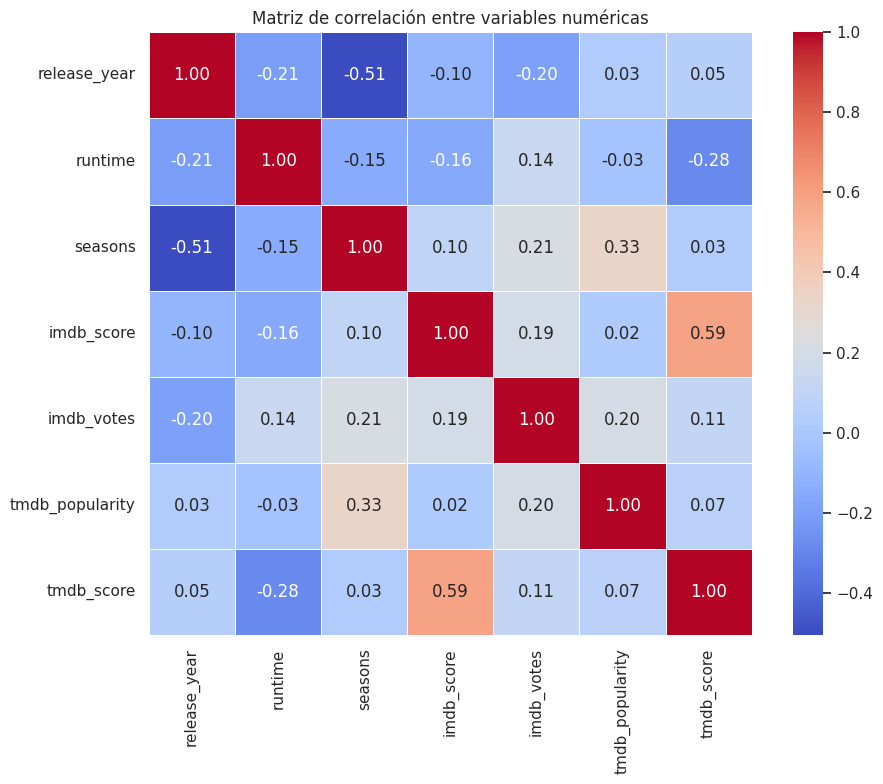

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

- imbd_score y tmdb_score tienen una correlación positiva moderada de 0,59. Aunque se encuentran en escalas y usuarios distintos, las puntuaciones tienden a coincidir en general.
- release_year y seasons, cuanto más nuevo el contenido, menos temporadas tiene. Es probable que aún no salieron más temporadas aún o son miniseries modernas.

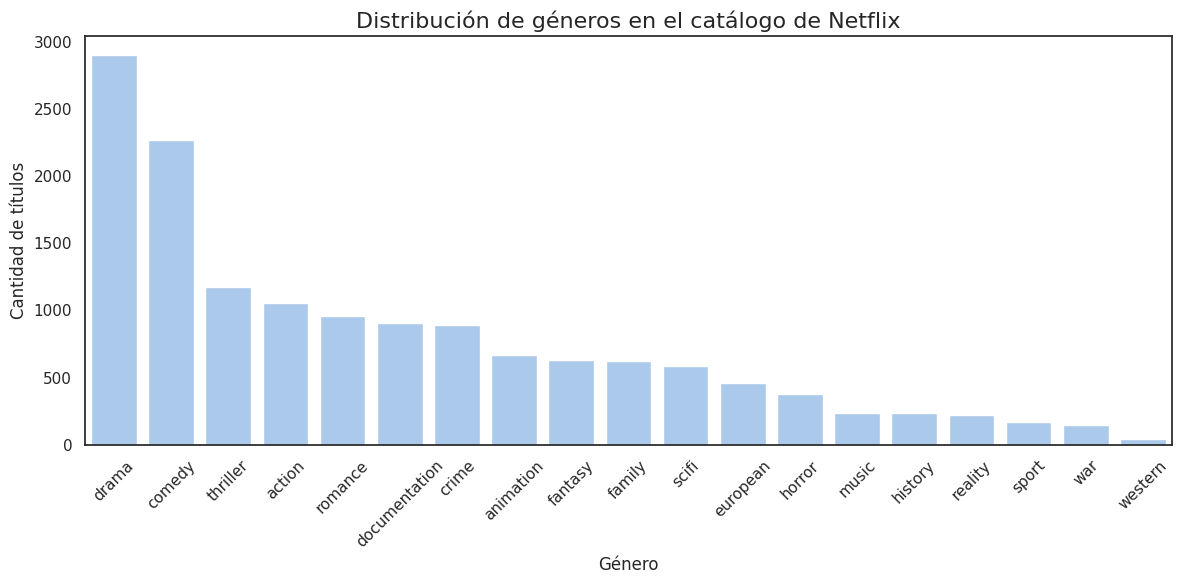

In [25]:
# Convertimos el string a lista
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Contar ocurrencias de cada género
generos = Counter([genero for sublista in df['genres'].dropna() for genero in sublista])
generos_ordenados = dict(sorted(generos.items(), key=lambda item: item[1], reverse=True))

# Crear DataFrame para graficar
generos_df = pd.DataFrame(generos_ordenados.items(), columns=['Género', 'Frecuencia'])

# Barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=generos_df, x='Género', y='Frecuencia')

# Títulos y etiquetas
plt.title('Distribución de géneros en el catálogo de Netflix', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de títulos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico se observa que el catálogo de Netflix está orientado a los géneros Drama y Comedia, puede reflejar mayor demanda a estos estilos.

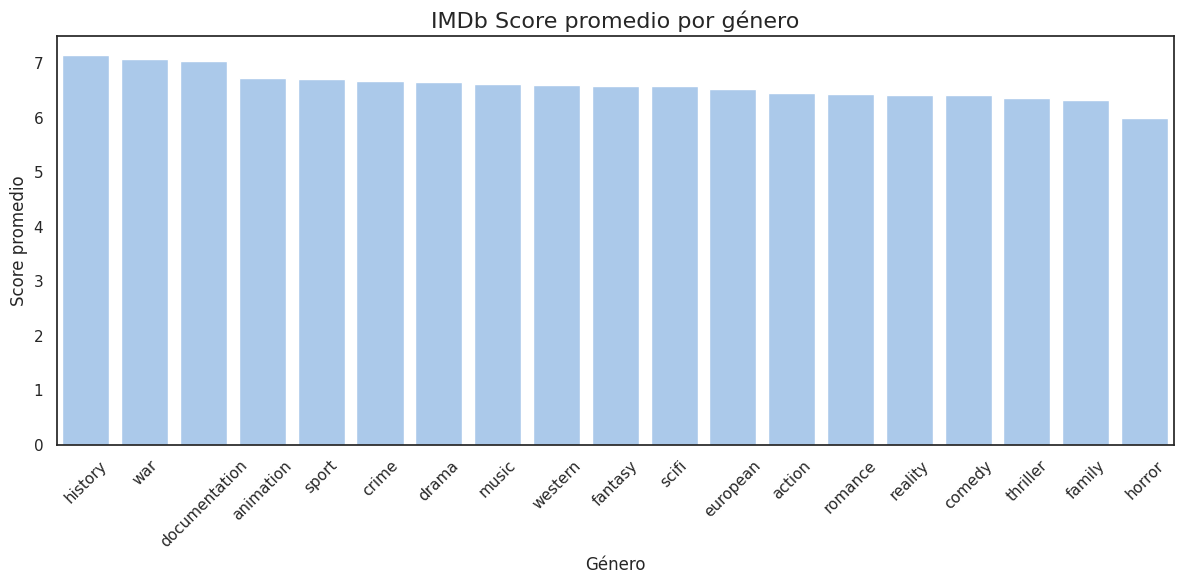

In [26]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode géneros para agrupar y calcular promedio
df_exp = df.explode('genres').dropna(subset=['imdb_score'])

promedios = df_exp.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=promedios, x='genres', y='imdb_score')
plt.title('IMDb Score promedio por género', fontsize=16)
plt.xlabel('Género')
plt.ylabel('Score promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

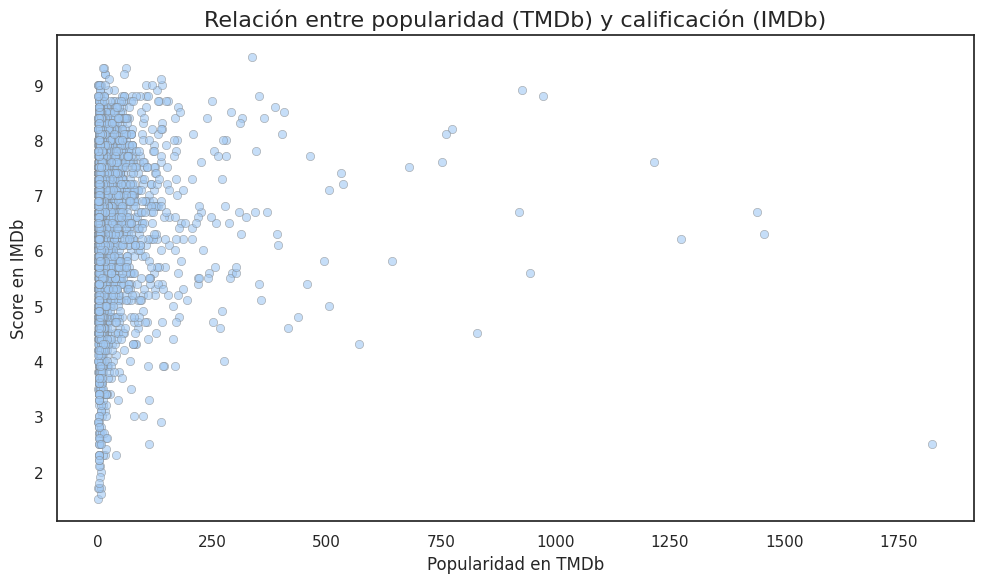

In [27]:
# Relación entre popularidad (TMDb) y score (IMDb)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tmdb_popularity', y='imdb_score', alpha=0.6, edgecolor='gray')
plt.title('Relación entre popularidad (TMDb) y calificación (IMDb)', fontsize=16)
plt.xlabel('Popularidad en TMDb', fontsize=12)
plt.ylabel('Score en IMDb', fontsize=12)
plt.tight_layout()
plt.show()

No se observa una correlación fuerte entre popularidad y calificación, es decir, un título puede ser popular pero no tener un buen puntaje o al revés.

#### Preparación de los datos para el modelo

Se tienen valores nulos referentes a los registros de votación, popularidad y puntuaciones. Se considera que los mismos son de gran importancia para el desarrollo de los futuros modelos por lo que se eliminan aquellos que son nulos en su totalidad.

In [28]:
df[df[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].isnull().all(axis=1)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
630,ts95855,Wedding Planner,SHOW,This is a love comedy that takes you behind th...,2002,TV-14,39,[drama],[],1.0,tt7885290,NaN,NaN,NaN,NaN
689,tm1077037,Chhota Bheem & Krishna: Pataliputra- City of t...,MOVIE,Krishna needs Bheem's help: The ruined city of...,2010,G,65,[animation],['IN'],NaN,tt6543110,NaN,NaN,NaN,NaN
906,tm1077038,Chhota Bheem: Journey to Petra,MOVIE,"The king has been away to meet an old friend, ...",2011,G,67,[animation],['IN'],NaN,tt6543194,NaN,NaN,NaN,NaN
1200,ts144527,World at Your Feet,SHOW,A group of struggling individuals are united b...,2014,TV-14,44,[drama],['SG'],1.0,tt4544590,NaN,NaN,NaN,NaN
1613,tm526163,Dinosaur World,MOVIE,Scientist Khojwala finds it difficult to nurtu...,2015,NaN,65,"[animation, comedy, drama]",['IN'],NaN,tt6536576,NaN,NaN,NaN,NaN
1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN
3019,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,[reality],[],1.0,tt8908110,NaN,NaN,NaN,NaN
4000,ts314647,Patton Oswalt: I Love Everything,SHOW,Turning 50. Finding love again. Buying a house...,2020,NaN,53,[],[],1.0,NaN,NaN,NaN,NaN,NaN
5269,tm1074621,Bridgerton - The Afterparty,MOVIE,"""Bridgerton"" cast members share behind-the-sce...",2021,NaN,38,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5780,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.dropna(subset=['imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how='all')

Como la variable objetivo es el imdb score se eliminan los registros que tienen este valor nulo.

In [30]:
# Eliminar filas donde imdb_score es nulo
df = df.dropna(subset=['imdb_score'])

In [31]:
# Mostrar las filas con valores nulos en imdb_votes
filas_nulas_imdb_votes = df[df['imdb_votes'].isnull()]
filas_nulas_imdb_votes.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
976,tm144046,Jackass Presents: Bad Grandpa .5,MOVIE,Bad Grandpa .5 gives you a whole new perspecti...,2014,PG-13,86,[comedy],['US'],NaN,tt3766424,6.3,NaN,20.423,5.9
1180,tm163066,Xenos,MOVIE,"In 2010, Abu Eyad and other young Palestinian ...",2013,NaN,12,[documentation],['GB'],NaN,tt3289618,7.8,NaN,1.400,5.0
2797,tm995893,The Crossing,MOVIE,Three Palestinian siblings eagerly attempt to ...,2017,NaN,10,[documentation],['PS'],NaN,tt7466040,7.5,NaN,0.998,6.0
3680,tm826563,A Cinderella Story: Christmas Wish,MOVIE,Kat is an aspiring singer-songwriter who dream...,2019,PG,93,[romance],['US'],NaN,tt10326928,5.3,NaN,18.575,6.5
4054,tm835869,Jarhead: Law of Return,MOVIE,"Major Ronan Jackson, an accomplished fighter p...",2019,R,103,[war],"['US', 'IL']",NaN,tt10767720,5.6,NaN,27.926,6.5


In [32]:
# Se completa con la mediana de votos según tipo (MOVIE o SHOW)
df['imdb_votes'] = df.groupby('type')['imdb_votes'].transform(
    lambda x: x.fillna(x.median()))

In [33]:
# Relleno con mediana según tipo
df['tmdb_popularity'] = df.groupby('type')['tmdb_popularity'].transform(lambda x: x.fillna(x.median()))
df['tmdb_score'] = df.groupby('type')['tmdb_score'].transform(lambda x: x.fillna(x.median()))

In [34]:
# Relleno con categoría "Desconocido" para los registros nulos de age_certification
df['age_certification'] = df['age_certification'].fillna('Unknown')

In [35]:
# Se asigna 0 a las películas debido a que las películas no tienen temporadas
df.loc[(df['type'] == 'MOVIE') & (df['seasons'].isnull()), 'seasons'] = 0

Las columnas title y description contienen información textual descriptiva del contenido, pero no aportan valor predictivo directo para los modelos de regresión o clasificación que se buscan desarrollar.

In [36]:
df = df.drop(columns=['description'])
df = df.drop(columns=['title'])

In [37]:
#Ver nulos
df.isnull().sum()

,0
id,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0
imdb_id,0
imdb_score,0


A partir de esta exploración, se entrena un modelo de clasificación para predecir si un título puede considerarse "bien valorado" según su puntuación en IMDb. El análisis combina herramientas de Python como pandas, matplotlib, seaborn y scikit-learn, y permite obtener insights útiles para perfiles interesados en curaduría de contenido, marketing o desarrollo de productos audiovisuales.

Aunque imdb_score es originalmente una variable continua, podés convertirla en clases (clasificación ordinal o categórica) para predecir, por ejemplo, si una película es:

- Baja calidad (<6.0)

- Media calidad (6.0–7.9)

- Alta calidad (≥8.0)



Además del modelo de clasificación, se implementa un modelo de regresión con el objetivo de predecir la puntuación promedio en IMDb. Este enfoque permite estimar el nivel de valoración que podría alcanzar un título según sus características, contribuyendo a una mejor comprensión del impacto que tienen factores como el género, la duración, el país de producción y el año de estreno en la percepción del público.

imdb_score es una variable numérica continua que representa la calificación de una película o serie en IMDb. Un modelo de regresión puede predecir esta puntuación en función de características como las presentadas en el dataset

In [38]:
df.head()

,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,MOVIE,1976,R,113,"[crime, drama]",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,MOVIE,1975,PG,91,"[comedy, fantasy]",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,MOVIE,1979,R,94,[comedy],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,MOVIE,1973,R,133,[horror],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,SHOW,1969,TV-14,30,"[comedy, european]",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3


#### Normalización y Estandarización

In [39]:
# Codificar la variable type
le_type = LabelEncoder()
df['type_enc'] = le_type.fit_transform(df['type'])
df = df.drop(columns=['type'])

In [40]:
#ver el unique de age_certification
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'Unknown', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [41]:
edad_map = {
    'Unknown': -1,
    'TV-Y': 0,
    'TV-Y7': 1,
    'G': 2,
    'TV-G': 3,
    'TV-PG': 4,
    'PG': 5,
    'PG-13': 6,
    'TV-14': 7,
    'R': 8,
    'NC-17': 9,
    'TV-MA': 10
}

df['age_certification_ord'] = df['age_certification'].map(edad_map)
df.drop(columns=['age_certification'], inplace=True)

La columna id y imdb_id contiene un identificador único para cada registro, que es de tipo texto y no representa una característica intrínseca del dato. Como tal, no aporta información relevante para la predicción ni influye en el comportamiento de las variables objetivo. Además, su inclusión puede generar ruido o sesgos en el modelo, ya que cada valor es único y no se relaciona con patrones útiles para el aprendizaje.

Por estas razones, eliminar la columna id es una práctica estándar en la preparación de datos para modelos de machine learning, ya que ayuda a evitar variables irrelevantes que podrían perjudicar la performance y la interpretabilidad del modelo.

In [42]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['imdb_id'], inplace=True)

genres tiene varias categorías por fila, por eso usamos one-hot encoding para convertir cada género en una columna binaria. Así el modelo puede entender y usar esa información correctamente.

In [43]:
df = pd.concat([df.drop('genres', axis=1),
                df['genres'].str.join('|').str.get_dummies()], axis=1)

In [44]:
# Convertir los strings tipo "['US', 'IL']" a listas reales
df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Unir las listas como strings separadas por "|"
df['production_countries_str'] = df['production_countries'].apply(lambda x: '|'.join(x))

# Crear columnas dummy
df_countries = df['production_countries_str'].str.get_dummies(sep='|')

# Reemplazar en el DataFrame
df = pd.concat([df.drop(columns=['production_countries', 'production_countries_str']), df_countries], axis=1)


In [45]:
df.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,age_certification_ord,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AF,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BY,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KG,KH,KR,KW,LB,LT,LU,Lebanon,MA,MU,MW,MX,MY,MZ,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SK,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
1,1976,113,0.0,8.3,795222.0,27.612,8.2,0,8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1975,91,0.0,8.2,530877.0,18.216,7.8,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1979,94,0.0,8.0,392419.0,17.505,7.8,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1973,133,0.0,8.1,391942.0,95.337,7.7,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1969,30,4.0,8.8,72895.0,12.919,8.3,1,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Guardar como CSV
df.to_csv('datos_procesados.csv', index=False)